In [32]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import fftconvolve

In [33]:
img = np.array(Image.open('images/frame_gray.png'))

1. Find all the lines.

In [34]:
H = 1/52
X = -1/37
line_kernel = np.array([
    [0, 0, 0, 0, H, H, H, 0, 0, 0, 0],
    [0, 0, H, H, H, H, H, H, H, 0, 0],
    [0, H, H, H, X, X, X, H, H, H, 0],
    [0, H, H, X, X, X, X, X, H, H, 0],
    [H, H, X, X, X, X, X, X, X, H, H],
    [H, H, X, X, X, X, X, X, X, H, H],
    [H, H, X, X, X, X, X, X, X, H, H],
    [0, H, H, X, X, X, X, X, H, H, 0],
    [0, H, H, H, X, X, X, H, H, H, 0],
    [0, 0, H, H, H, H, H, H, H, 0, 0],
    [0, 0, 0, 0, H, H, H, 0, 0, 0, 0]
])

In [35]:
line_conv = fftconvolve(img, line_kernel)

In [36]:
lines_img = np.zeros(
    tuple(line_conv.shape) + (3,),
    dtype=np.uint8
)

pixels = line_conv.astype(np.int16).copy()
np.place(pixels, pixels < 0, 0)
np.place(pixels, pixels > np.ceil(pixels.flatten().mean()), 255)
np.place(pixels, pixels <= np.ceil(pixels.flatten().mean()), 0)
pixels = pixels.astype(np.uint8)

lines_img[:,:,0] = pixels
lines_img[:,:,1] = pixels
lines_img[:,:,2] = pixels

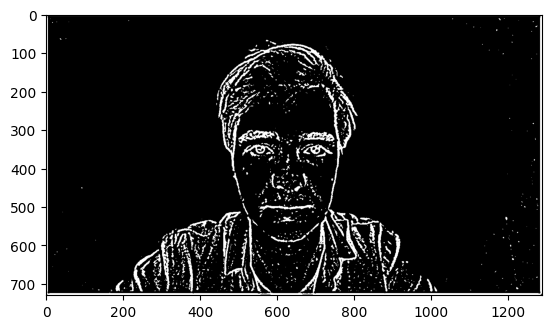

In [37]:
plt.imshow(pixels, cmap='gray', vmin=0, vmax=255)

2. Find all the circles.

In [58]:
H = 1/52
# X = -1/37
X = 0.0
O = 0.0
circle_kernel = np.array([
    [O, O, O, O, H, H, H, O, O, O, O],
    [O, O, H, H, H, H, H, H, H, O, O],
    [O, H, H, H, X, X, X, H, H, H, O],
    [O, H, H, X, X, X, X, X, H, H, O],
    [H, H, X, X, X, X, X, X, X, H, H],
    [H, H, X, X, X, X, X, X, X, H, H],
    [H, H, X, X, X, X, X, X, X, H, H],
    [O, H, H, X, X, X, X, X, H, H, O],
    [O, H, H, H, X, X, X, H, H, H, O],
    [O, O, H, H, H, H, H, H, H, O, O],
    [O, O, O, O, H, H, H, O, O, O, O]
])

In [59]:
circle_conv = fftconvolve(lines_img[:,:,0], circle_kernel)

In [60]:
circles_img = np.zeros(
    tuple(circle_conv.shape) + (3,),
    dtype=np.uint8
)

pixels = circle_conv.astype(np.int16).copy()
np.place(pixels, pixels < 0, 0)
np.place(pixels, pixels > np.ceil(pixels.flatten().mean()), 255)
np.place(pixels, pixels <= np.ceil(pixels.flatten().mean()), 0)
pixels = pixels.astype(np.uint8)

circles_img[:,:,0] = pixels
circles_img[:,:,1] = pixels
circles_img[:,:,2] = pixels

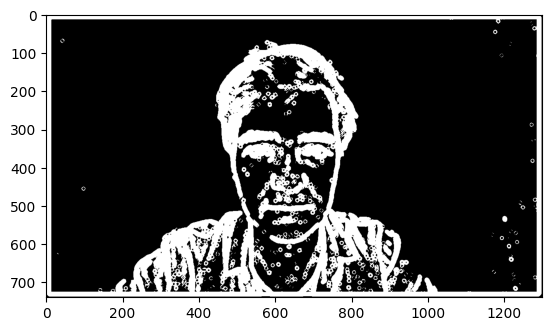

In [61]:
plt.imshow(circles_img)

In [106]:
def unit_circle_vectorized(r, threshold=1):
    A = np.arange(-r,r+1)**2
    dists = np.sqrt(A[:,None] + A)
    return (np.abs(dists-r)<threshold).astype(int)

In [139]:
def unit_circle_vectorized(r, threshold=1):
    A = np.arange(-r,r+1)**2
    dists = np.sqrt(A[:,None] + A)
    return (np.abs(dists-r)<threshold).astype(int) + \
           (np.abs(dists-r) > (threshold+1.5)).astype(int)

In [140]:
circle_kernel = unit_circle_vectorized(4).astype(np.float32)
print(circle_kernel)
counts = np.unique(circle_kernel, return_counts=True)
np.place(circle_kernel, circle_kernel == counts[0][0], 0)
np.place(circle_kernel, circle_kernel == counts[0][1], 1/counts[1][1])

[[0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0. 1. 1. 1. 0.]
 [1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 1. 1. 1. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 0. 1.]
 [1. 1. 0. 1. 1. 1. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]]


In [119]:
H = 1/52
# X = -1/37
X = -1/69
O = -1/69
circle_kernel = np.array([
    [O, O, O, O, H, H, H, O, O, O, O],
    [O, O, H, H, H, H, H, H, H, O, O],
    [O, H, H, H, X, X, X, H, H, H, O],
    [O, H, H, X, X, X, X, X, H, H, O],
    [H, H, X, X, X, X, X, X, X, H, H],
    [H, H, X, X, X, X, X, X, X, H, H],
    [H, H, X, X, X, X, X, X, X, H, H],
    [O, H, H, X, X, X, X, X, H, H, O],
    [O, H, H, H, X, X, X, H, H, H, O],
    [O, O, H, H, H, H, H, H, H, O, O],
    [O, O, O, O, H, H, H, O, O, O, O]
])

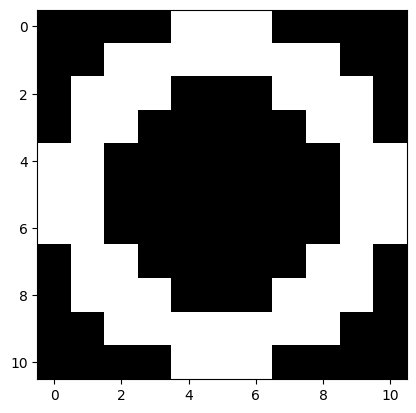

In [120]:
plt.imshow(circle_kernel*52*255, cmap='gray', vmin=0, vmax=255)

In [121]:
circle_conv = fftconvolve(circle_kernel*52*255, circle_kernel)

In [130]:
circles_img = np.zeros(
    tuple(circle_conv.shape) + (3,),
    dtype=np.uint8
)

blue = circle_conv.copy()
np.place(blue, blue > 0, 0)
blue = abs(blue)
np.place(blue, blue > np.ceil(blue.flatten().mean())+200, 255)
np.place(blue, blue <= np.ceil(blue.flatten().mean())+200, 0)

red = circle_conv.copy()
np.place(red, red < 0, 0)
np.place(red, red > np.ceil(red.flatten().mean())+200, 255)
np.place(red, red <= np.ceil(red.flatten().mean())+200, 0)

circles_img[:,:,0] = red.astype(np.uint8)
circles_img[:,:,2] = blue.astype(np.uint8)

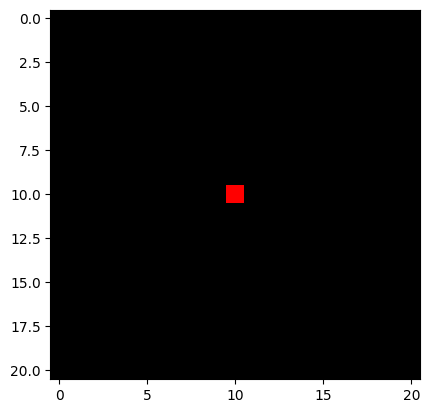

In [131]:
plt.imshow(circles_img)